# Assignment

Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

 Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-full.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
data[data.duplicated()].shape

(0, 17)

In [10]:
data1 = pd.get_dummies(data,columns=['job', 'marital', 'education','contact','month','poutcome'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
#Checking for binary o/p variables
binary_features=[feature for feature in data.columns if data[feature].unique().size == 2]
print('Number of binary variables:', len(binary_features))
data[binary_features].head()

Number of binary variables: 4


,default,housing,loan,y
0,no,yes,no,no
1,no,yes,no,no
2,no,yes,yes,no
3,no,yes,no,no
4,no,no,no,no


In [12]:
#Changing the outcome of binary variables into 0 and 1 instead of yes and no
data2 = data1.copy()
for feature in binary_features:
    data2[feature] = np.where(data1[feature].str.contains("yes"), 1, 0)
data2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
pd.set_option("display.max.columns", None)
data2

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [15]:
#Checking for numerical features
df_numerical = data.select_dtypes(exclude='object')
df_numerical.head(3)

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0


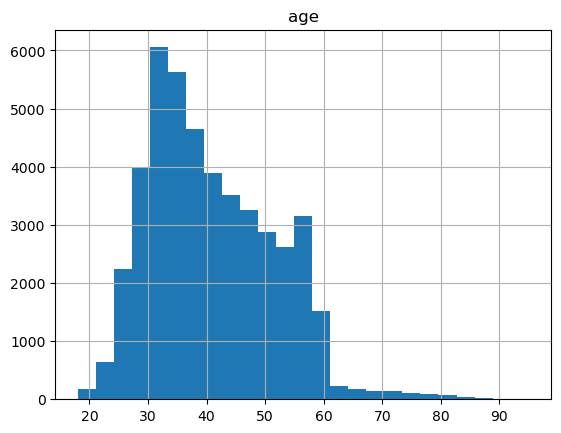

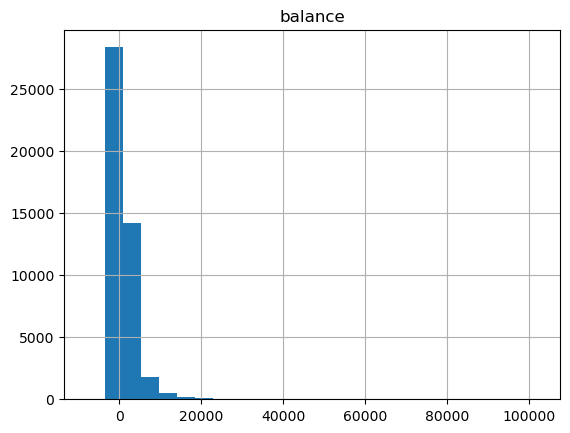

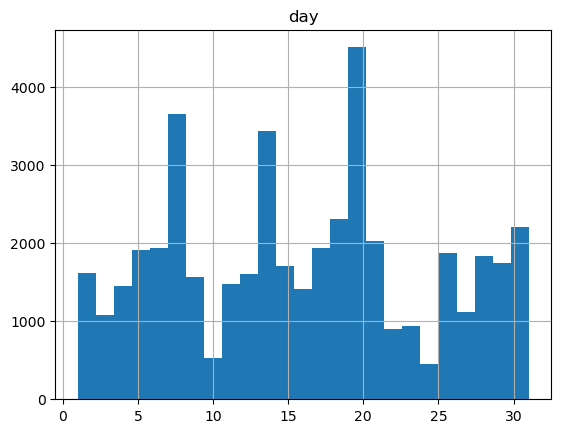

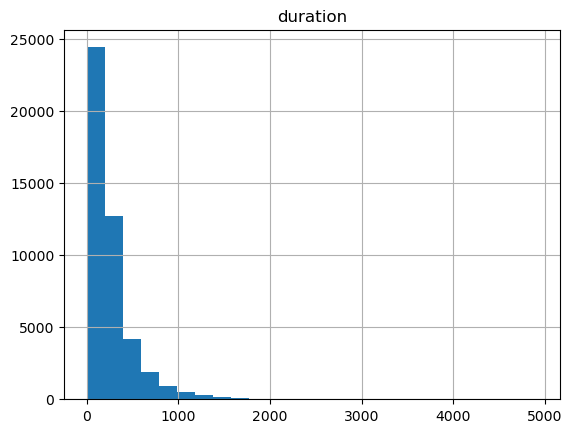

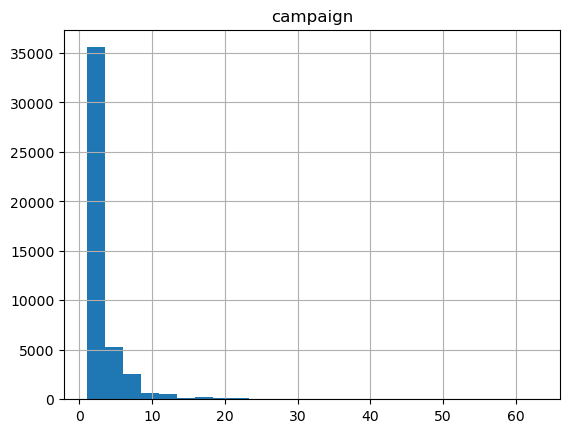

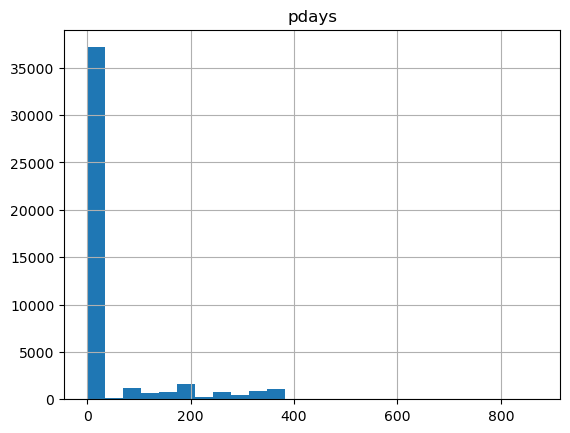

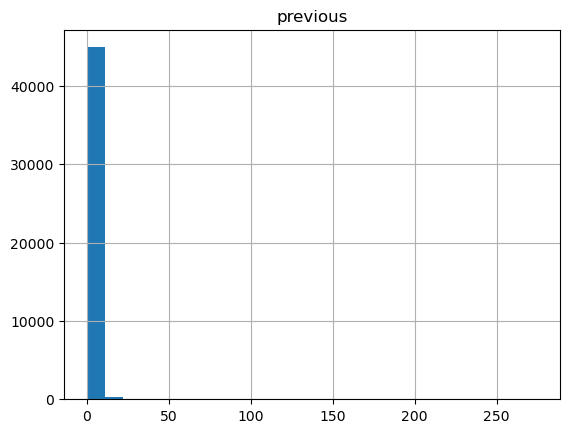

In [16]:
#plotting the histogram for numerical features to know the distribution
for column in df_numerical.columns:
    df_numerical[column].hist(bins=25)
    plt.title(column)
    plt.show()

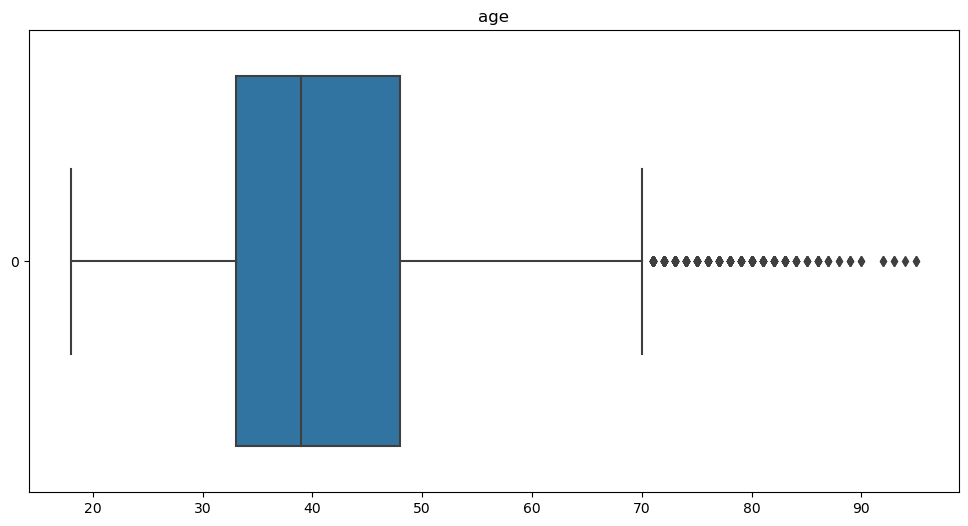

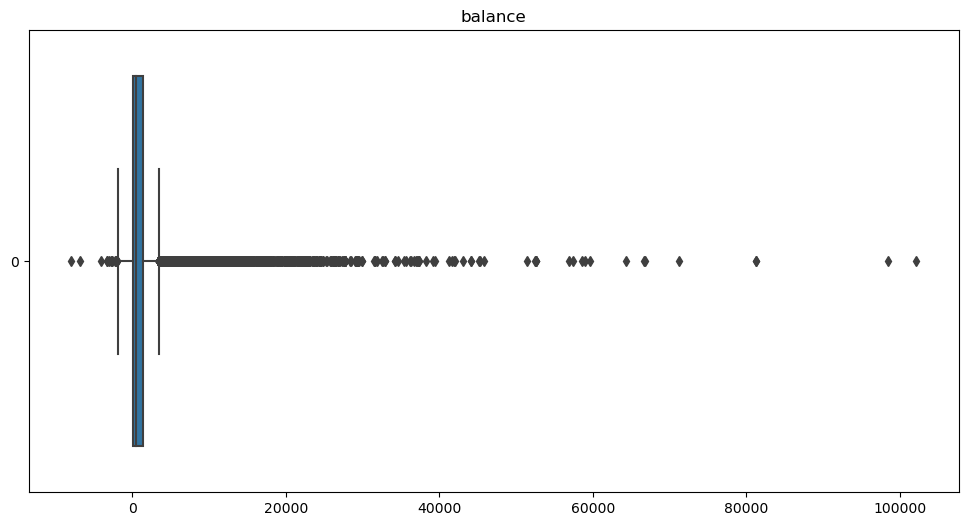

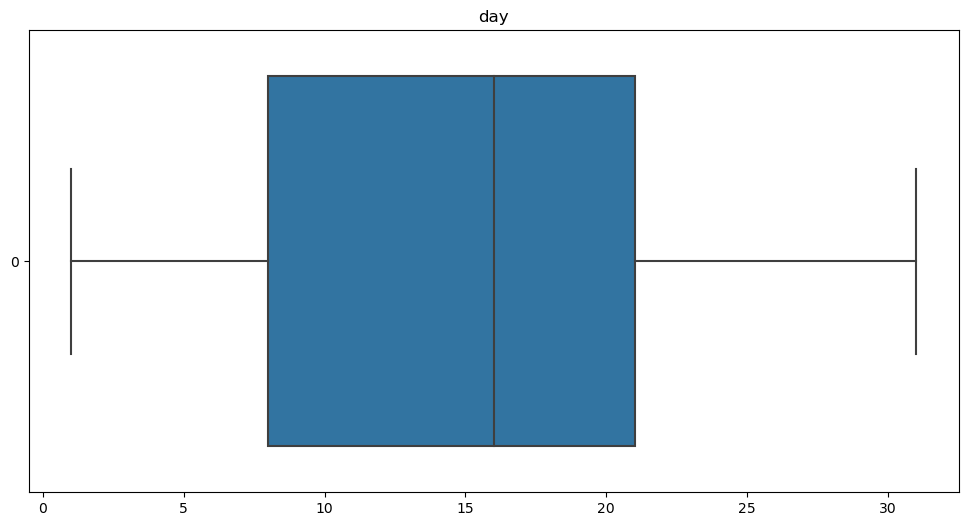

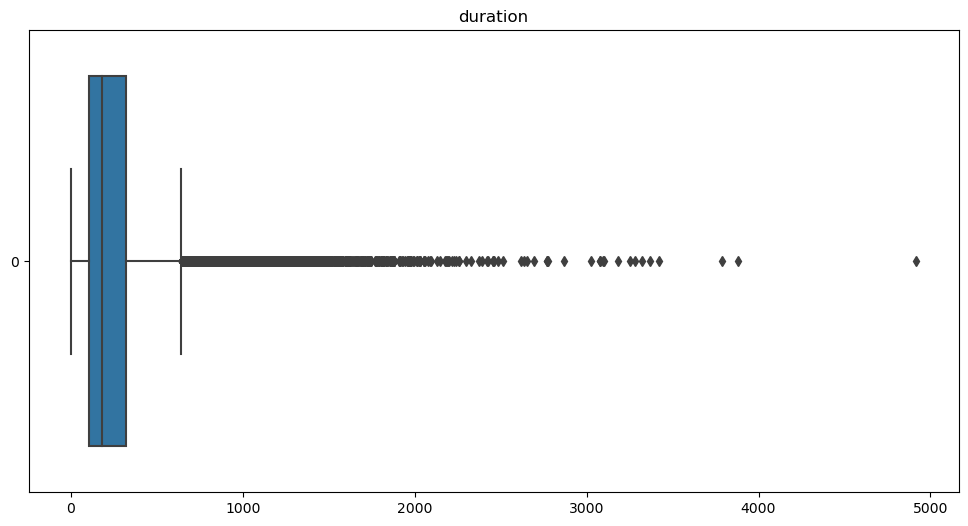

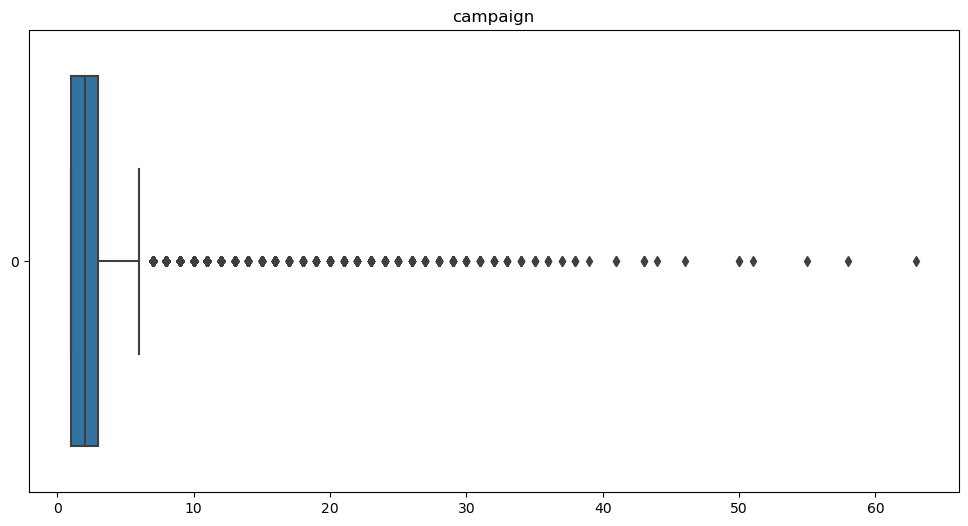

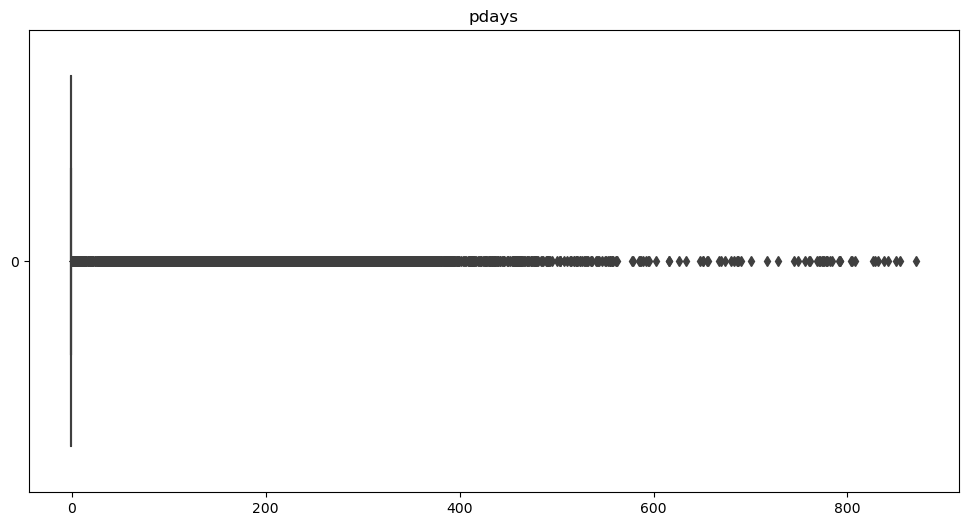

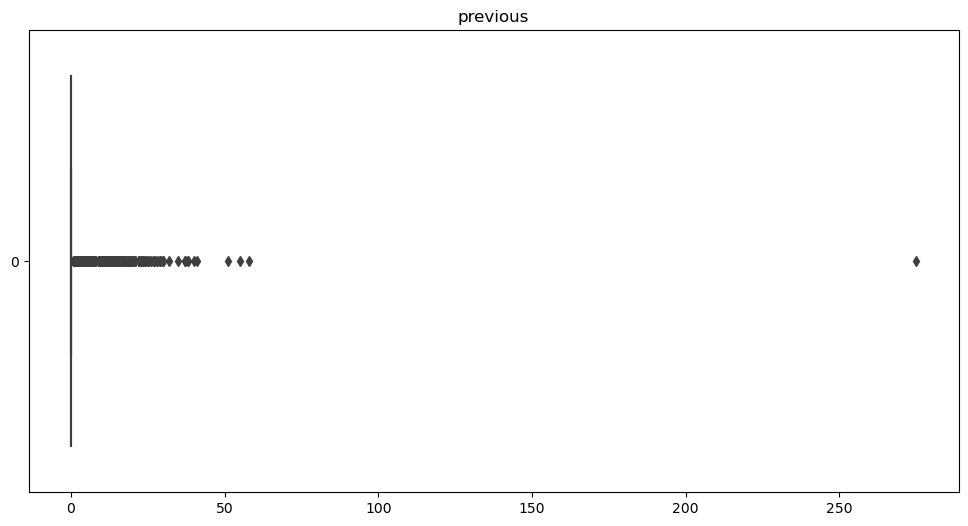

In [17]:
#Plotting box-plot for detecting outliers
for column in df_numerical.columns:
    plt.figure(figsize=(12,6))
    sb.boxplot(df_numerical[column],orient="h")
    plt.title(column)
    plt.show()

<AxesSubplot: xlabel='y', ylabel='count'>

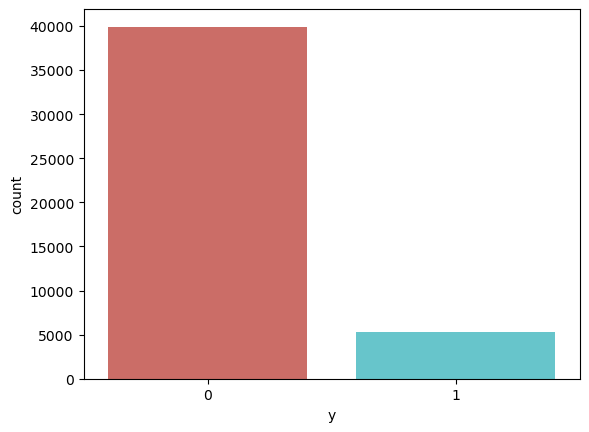

In [18]:
sb.countplot(x='y',data=data2,palette='hls')

<AxesSubplot: xlabel='loan', ylabel='count'>

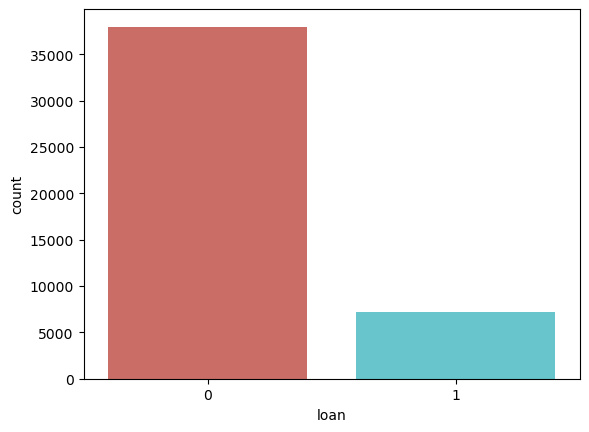

In [19]:
sb.countplot(x='loan',data=data2,palette='hls')

<AxesSubplot: xlabel='housing', ylabel='count'>

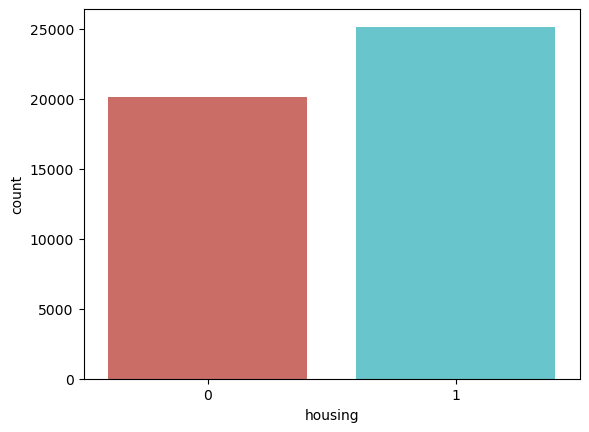

In [20]:
sb.countplot(x='housing',data=data2,palette='hls')

<AxesSubplot: xlabel='default', ylabel='count'>

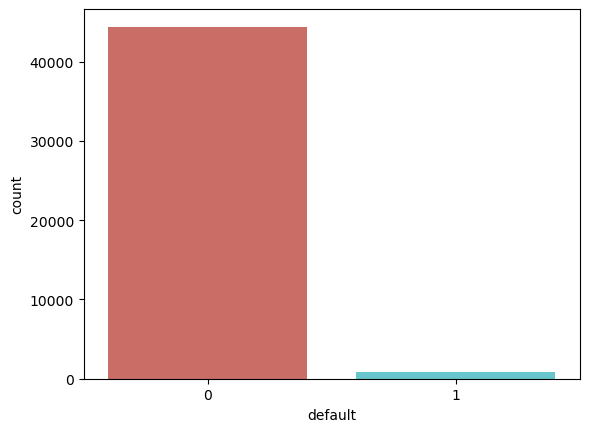

In [21]:
sb.countplot(x='default',data=data2,palette='hls')

<AxesSubplot: xlabel='housing'>

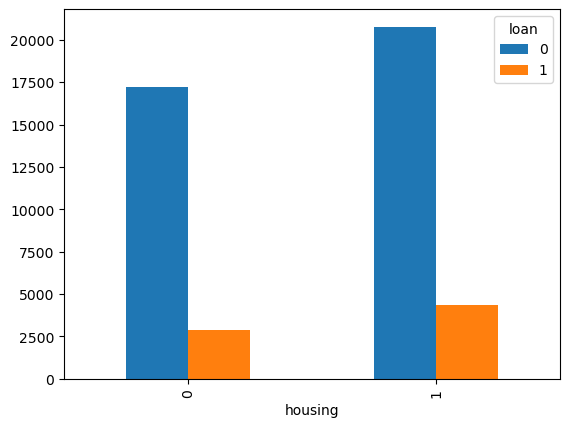

In [22]:
pd.crosstab(data2.housing,data2.loan).plot(kind="bar")

<AxesSubplot: xlabel='housing'>

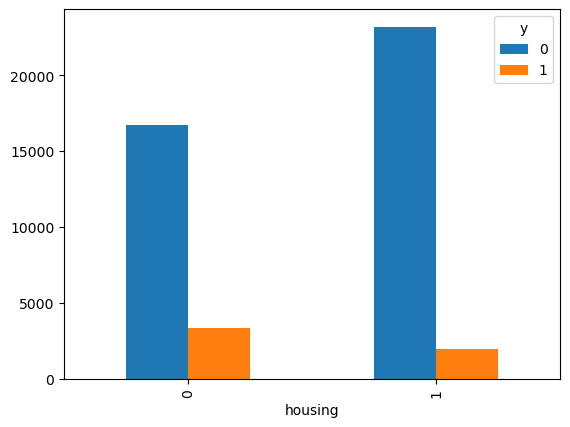

In [23]:
pd.crosstab(data2.housing,data2.y).plot(kind="bar")

<AxesSubplot: xlabel='default'>

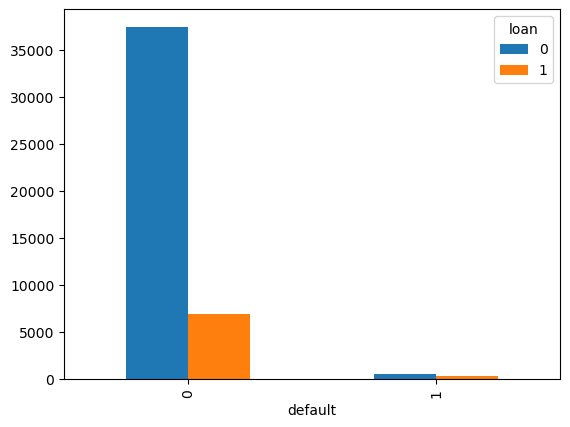

In [24]:
pd.crosstab(data2.default,data2.loan).plot(kind="bar")

<AxesSubplot: xlabel='loan'>

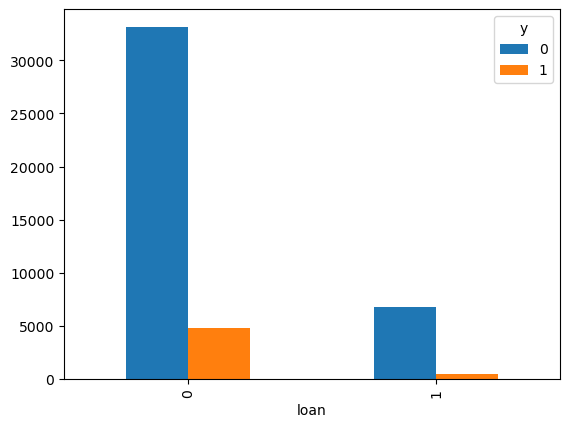

In [25]:
pd.crosstab(data2.loan,data2.y).plot(kind="bar")

In [26]:
total_binary_features=[feature for feature in data2.columns if data2[feature].unique().size == 2]
print('Number of binary variables:', len(total_binary_features))
data2[total_binary_features].head()

Number of binary variables: 42


,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [27]:
for feature in total_binary_features:
    print(data2[feature].value_counts())
    print("******************************")

0    44396
1      815
Name: default, dtype: int64
******************************
1    25130
0    20081
Name: housing, dtype: int64
******************************
0    37967
1     7244
Name: loan, dtype: int64
******************************
0    39922
1     5289
Name: y, dtype: int64
******************************
0    40040
1     5171
Name: job_admin., dtype: int64
******************************
0    35479
1     9732
Name: job_blue-collar, dtype: int64
******************************
0    43724
1     1487
Name: job_entrepreneur, dtype: int64
******************************
0    43971
1     1240
Name: job_housemaid, dtype: int64
******************************
0    35753
1     9458
Name: job_management, dtype: int64
******************************
0    42947
1     2264
Name: job_retired, dtype: int64
******************************
0    43632
1     1579
Name: job_self-employed, dtype: int64
******************************
0    41057
1     4154
Name: job_services, dtype: int64
****************

In [28]:
data2.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0


In [29]:
#We can see there are no null values 
#Model Building

In [30]:
data2.shape

(45211, 49)

In [31]:
#getting the location of target variable
target_index = data2.columns.get_loc("y")
target_index

10

In [32]:
#dividing the target variable as y and concating all  other variables into x
x = pd.concat([data2.iloc[:,0:10],data2.iloc[:,11:]],axis=1)
y = data2.iloc[:,10]
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [33]:
classifier.coef_

array([[-1.78461908e-02, -2.05034606e-02,  2.02687402e-05,
        -7.49113626e-01, -2.16028846e-01, -1.09963291e-02,
         3.81428947e-03, -4.03667683e-01,  2.49783464e-03,
        -1.44783426e-01, -3.01649984e-02, -2.83654360e-01,
        -3.02276418e-02, -9.79941259e-03,  7.14345564e-03,
         1.85916436e-01, -1.79689437e-02, -9.94713085e-02,
         3.38280291e-02, -7.81490930e-02,  3.25791745e-03,
         2.75642327e-03,  1.80316919e-02, -1.94292099e-01,
        -1.40273089e-01, -7.81853931e-02, -3.04737991e-01,
         5.11574831e-02,  1.52324048e-02,  1.02551734e-01,
         5.68342915e-02, -4.75919522e-01,  4.59264670e-02,
         2.70267633e-02,  3.22324014e-02, -1.60918658e-02,
        -1.53138879e-02, -9.19246658e-02, -6.10829440e-02,
         9.72534967e-02, -4.64419951e-01, -6.43357812e-02,
         1.10600041e-01,  8.35964307e-02, -1.51801711e-01,
        -3.60006537e-02,  3.48808495e-01, -4.77539627e-01]])

In [34]:
classifier.predict_proba(x)

array([[0.95592589, 0.04407411],
       [0.97531465, 0.02468535],
       [0.98181824, 0.01818176],
       ...,
       [0.33027597, 0.66972403],
       [0.92088476, 0.07911524],
       [0.89880671, 0.10119329]])

In [35]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
y_prob["y_pred"] = y_pred
y_prob

,0,1,y_pred
0,0.955926,0.044074,0
1,0.975315,0.024685,0
2,0.981818,0.018182,0
3,0.979462,0.020538,0
4,0.895813,0.104187,0
...,...,...,...
45206,0.388050,0.611950,1
45207,0.753917,0.246083,0
45208,0.330276,0.669724,1
45209,0.920885,0.079115,0


In [37]:
from sklearn.metrics import confusion_matrix
confusion_Matrix = confusion_matrix(y,y_pred)
confusion_Matrix

array([[39154,   768],
       [ 4128,  1161]])

In [38]:
pd.crosstab(y_pred,y)

y,0,1
row_0,,
0,39154,4128
1,768,1161


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [40]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc_score = roc_auc_score(y,y_pred)
logit_roc_auc_score

0.6001373409856537

Text(0.5, 1.0, 'Auc Curve')

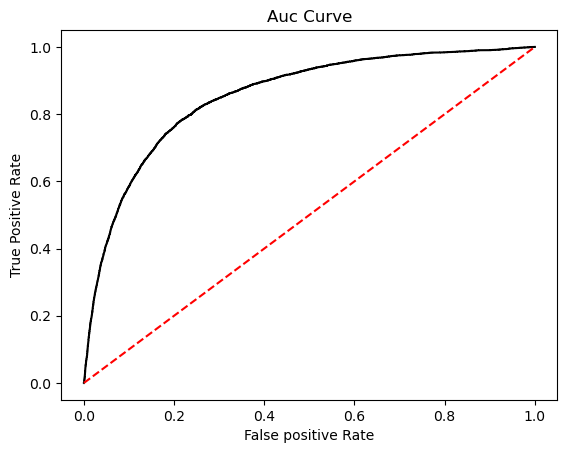

In [41]:
fpr, tpr, thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='black')
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Auc Curve")

In [42]:
y_prob1 = pd.DataFrame(classifier.predict_proba(x)[:,1])
y_prob1

,0
0,0.044074
1,0.024685
2,0.018182
3,0.020538
4,0.104187
...,...
45206,0.611950
45207,0.246083
45208,0.669724
45209,0.079115


In [43]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98121337e-01, 9.98121337e-01, 1.00000000e+00])

In [44]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(x)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)

accuracy_ls.columns = ["thresholds","accuracy"]
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls

,thresholds,accuracy
1139,4.480195e-01,0.892725
1143,4.472842e-01,0.892703
1158,4.442833e-01,0.892703
1147,4.464548e-01,0.892703
1140,4.476904e-01,0.892703
...,...,...
7182,1.618781e-05,0.121851
7183,1.617987e-05,0.121829
7184,6.449554e-07,0.118644
7185,6.341796e-07,0.118622


In [47]:
accuracy_ls[accuracy_ls['accuracy']==accuracy_ls['accuracy'].max()]

,thresholds,accuracy
1139,0.448019,0.892725


In [48]:
threshold = 0.448019
preds = np.where(classifier.predict_proba(x)[:,1]>threshold,1,0)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.59      0.27      0.37      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.62      0.65     45211
weighted avg       0.87      0.89      0.87     45211



In [49]:
preds

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
#Comparing with the rawdata
data4 = data.copy()
data4["predicted_y"] = preds
data4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,predicted_y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [51]:
data4[['y','predicted_y']]

,y,predicted_y
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
45206,yes,1
45207,yes,0
45208,yes,1
45209,no,0
